In [18]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df = df[df['job_title_short']=='Data Analyst']

In [10]:
df_exploded = df.explode('job_skills')

skill_stats = df_exploded.groupby('job_skills').agg(skill_count=('job_skills', 'count'), median_salary=('salary_year_avg', 'median'))

skills_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(10)

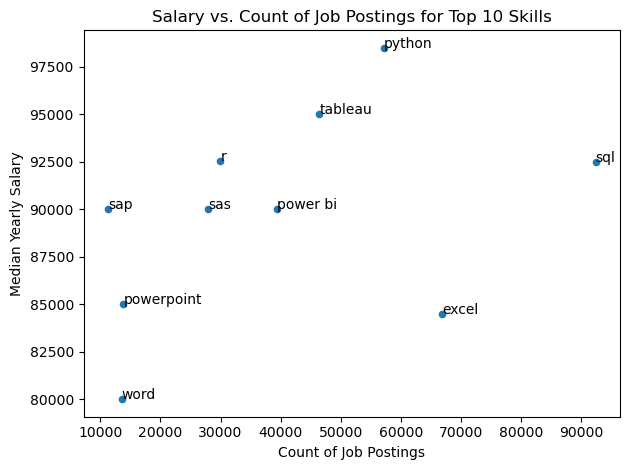

In [15]:
skills_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title('Salary vs. Count of Job Postings for Top 10 Skills')
plt.tight_layout()

for i, txt in enumerate(skills_stats.index):
    plt.text(skills_stats['skill_count'].iloc[i], skills_stats['median_salary'].iloc[i], txt)

plt.show()

Problems

In [25]:
df1 = df.groupby('job_title_short').agg(salary_avg=('salary_year_avg', 'median'), job_amount=('job_title_short', 'count'))
df1

,salary_avg,job_amount
job_title_short,,
Business Analyst,85000.0,49063
Cloud Engineer,90000.0,12331
Data Analyst,90000.0,196075
Data Engineer,125000.0,186241
Data Scientist,127500.0,172286
Machine Learning Engineer,106415.0,14080
Senior Data Analyst,111175.0,29216
Senior Data Engineer,147500.0,44563
Senior Data Scientist,155500.0,36957


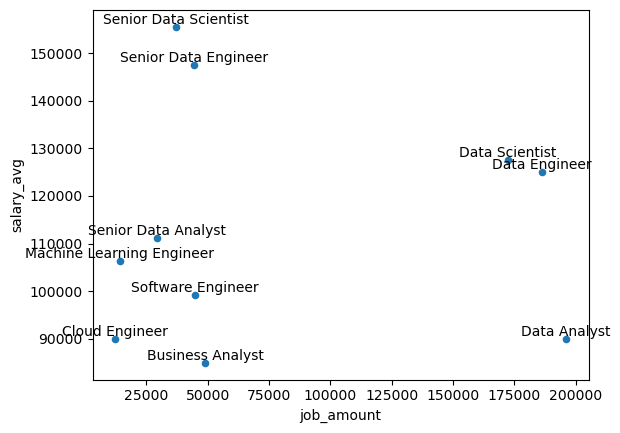

In [30]:
df1.plot(kind='scatter', x='job_amount', y='salary_avg')

for i in range(len(df1)):
   job_amount = df1['job_amount'].iloc[i]
   salary_avg = df1['salary_avg'].iloc[i]
   job_title = df1.index[i]
   plt.text(job_amount, salary_avg, job_title, ha='center', va='bottom')

In [36]:
top7 = df.job_country.value_counts().head(7)
top7

job_country
United States     206292
India              51088
United Kingdom     40375
France             39922
Germany            27694
Spain              25100
Singapore          23696
Name: count, dtype: int64

In [41]:
df2 = df.groupby('job_country').agg(job_count=('job_title_short', 'count'), median_ysalary=('salary_year_avg', 'median')).sort_values(by='job_count', ascending=False).head(7)
df2

,job_count,median_ysalary
job_country,,
United States,206292,119187.5
India,51088,111175.0
United Kingdom,40375,104668.0
France,39922,97444.0
Germany,27694,111175.0
Spain,25100,98391.5
Singapore,23696,100500.0


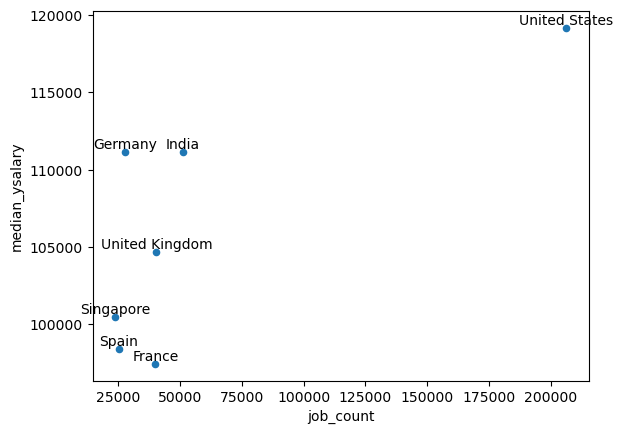

In [43]:
df2.plot(kind='scatter', x='job_count', y='median_ysalary')

for i in range(len(df2)):
   job_count = df2['job_count'].iloc[i]
   median_ysalary = df2['median_ysalary'].iloc[i]
   job_title = df2.index[i]
   plt.text(job_count, median_ysalary, job_title, ha='center', va='bottom')

In [44]:
target_job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']

In [79]:
df3 = df[df['job_title_short'].isin(['Data Analyst', 'Data Scientist', 'Data Engineer'])]
df3 = df3[df3['job_country']=='United States']
df3 = df3[df3['job_schedule_type'].isin(['Full-time', 'Contractor'])]
df3 = df3.dropna(subset=['salary_year_avg'])

df3


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
92,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,"Illinois, United States",2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,"[sql, python]","{'programming': ['sql', 'python']}"
100,Data Scientist,"Data Scientist, Risk Data Mining - USDS","Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-07-31 13:01:18,False,True,United States,year,228222.0,NaN,TikTok,"[sql, r, python, express]","{'programming': ['sql', 'r', 'python'], 'webfr..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"[python, r, alteryx, tableau]","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
116,Data Scientist,Data Scientist,Anywhere,via LinkedIn,Full-time,True,"Texas, United States",2023-10-04 13:04:23,False,False,United States,year,114000.0,NaN,4 Corner Resources,"[r, python, sql, t-sql, hadoop, spark, tableau]","{'analyst_tools': ['tableau'], 'libraries': ['..."
146,Data Engineer,Data Engineer Graduate (Real Time Communicatio...,"Seattle, WA",via LinkedIn,Full-time,False,"California, United States",2023-10-21 13:06:16,False,True,United States,year,129500.0,NaN,ByteDance,"[golang, scala, python, java, hadoop, spark]","{'libraries': ['hadoop', 'spark'], 'programmin..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785563,Data Scientist,Data Scientist I/II (Model Risk Management & M...,"Pensacola, FL",via Navy Federal Credit Union - Talentify,Full-time,False,"Florida, United States",2023-01-11 06:22:10,False,False,United States,year,136400.0,NaN,Navy Federal Credit Union,"[r, python, matplotlib, ggplot2, spark, word, ...","{'analyst_tools': ['word', 'power bi', 'tablea..."
785624,Data Engineer,Data Analytics Engineer (Hybrid),"Mt Prospect, IL",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-08-31 06:02:16,False,True,United States,year,139216.0,NaN,Bosch Group,"[go, python, r, sql, oracle, windows, alteryx,...","{'analyst_tools': ['alteryx', 'power bi', 'tab..."
785641,Data Engineer,Data Engineer,"New York, NY",via Dice,Full-time,False,Georgia,2023-01-04 16:36:07,True,False,United States,year,150000.0,NaN,"Engage Partners, Inc.",None,None
785648,Data Scientist,Director Data Scientist - Commercial Platforms...,"Pleasant Hill, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-04-12 06:02:51,False,True,United States,year,221875.0,NaN,84.51°,"[python, azure, snowflake, spark]","{'cloud': ['azure', 'snowflake'], 'libraries':..."


In [81]:
stats = df3.groupby('job_title_short').agg(median_salary=('salary_year_avg', 'median'), job_count=('job_title_short', 'count'))
stats['job_title_type'] = df3['job_title_short']+ ' - ' + df3['job_schedule_type']

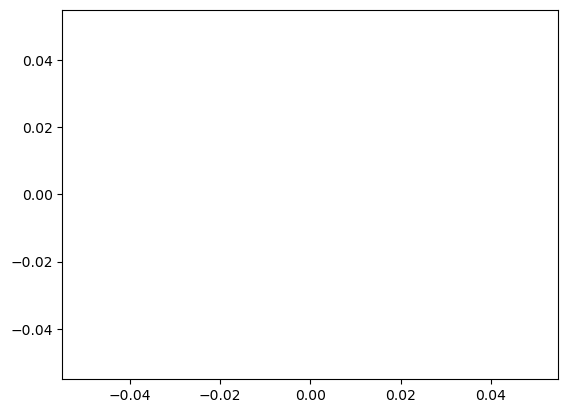

In [83]:
for job_title_type in stats['job_title_type'].unique():
    subset = stats[stats['job_title_type']==job_title_type]

plt.scatter(subset['job_count'], subset['median_salary'], label=job_title_type)

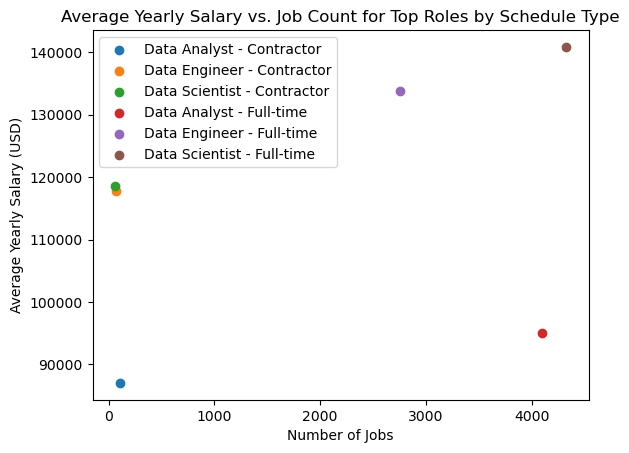

In [84]:
# Define specific job titles to include
target_job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']

# Filter US jobs for only full-time and part-time roles and specific job titles, then drop rows with missing salary data
us_jobs_df = df[
   (df['job_country'] == 'United States') &
   (df['job_schedule_type'].isin(['Full-time', 'Contractor'])) &
   (df['job_title_short'].isin(target_job_titles))
].dropna(subset=['salary_year_avg']).copy()

# Group by job schedule type and job title, calculate mean yearly salary and job count
stats = us_jobs_df.groupby(['job_schedule_type', 'job_title_short']).agg(
   mean_salary_year_avg=('salary_year_avg', 'mean'),
   job_count=('job_title_short', 'count')
).dropna()

# Reset the index to make plotting easier
stats.reset_index(inplace=True)

# Combine title and type into one value for labels
stats['job_title_type'] = stats['job_title_short'] + ' - ' + stats['job_schedule_type']

# Plot using plt.scatter()
for job_title_type in stats['job_title_type'].unique():
   subset = stats[stats['job_title_type'] == job_title_type]
   plt.scatter(subset['job_count'], subset['mean_salary_year_avg'], label=job_title_type)

plt.xlabel('Number of Jobs')
plt.ylabel('Average Yearly Salary (USD)')
plt.title('Average Yearly Salary vs. Job Count for Top Roles by Schedule Type')
plt.legend()
plt.show()